In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

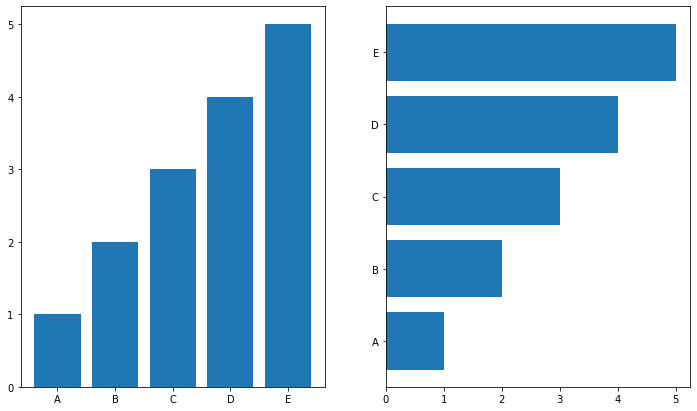

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(12, 7))

x = list('ABCDE')
y = np.array([1, 2, 3, 4, 5])

axes[0].bar(x, y)
axes[1].barh(x, y)

plt.show()

# 실제 데이터로 다양한 bar plot 그려보기

In [9]:
student = pd.read_csv('./StudentsPerformance.csv')
# student.head()
student.sample(10)    # sample로 데이터 확인하는것 선호

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
827,female,group C,some high school,standard,none,65,69,76
892,female,group A,master's degree,free/reduced,none,50,67,73
841,male,group C,some high school,standard,none,64,58,51
731,male,group A,some high school,free/reduced,none,55,46,43
615,female,group C,high school,standard,none,60,68,72
333,male,group B,associate's degree,standard,none,90,78,81
749,male,group B,some college,standard,completed,87,84,86
850,male,group C,master's degree,standard,none,71,67,67
562,male,group C,bachelor's degree,standard,completed,96,90,92
133,female,group C,some college,standard,completed,75,81,84


In [6]:
student.info()    # 데이터에 null값이 있는지, 범주형인지 순서형인지 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
student.describe(include='all')

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000
std,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657
min,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000
25%,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000
50%,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000
75%,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000


In [11]:
# 성별에 따른 race/ethincity 분포
group = student.groupby('gender')['race/ethnicity'].value_counts().sort_index()
display(group)
print(student['gender'].value_counts())

gender  race/ethnicity
female  group A            36
        group B           104
        group C           180
        group D           129
        group E            69
male    group A            53
        group B            86
        group C           139
        group D           133
        group E            71
Name: race/ethnicity, dtype: int64

female    518
male      482
Name: gender, dtype: int64


## 2-1 Multiple Bar Plot

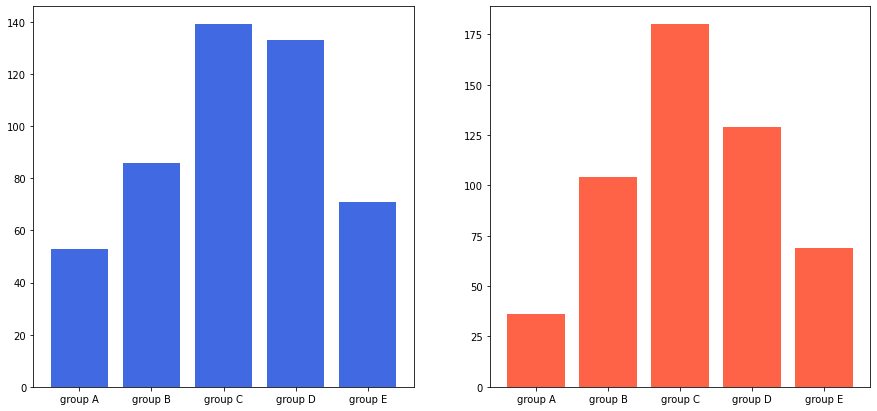

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
axes[0].bar(group['male'].index, group['male'], color='royalblue')
axes[1].bar(group['female'].index, group['female'], color='tomato')
plt.show()

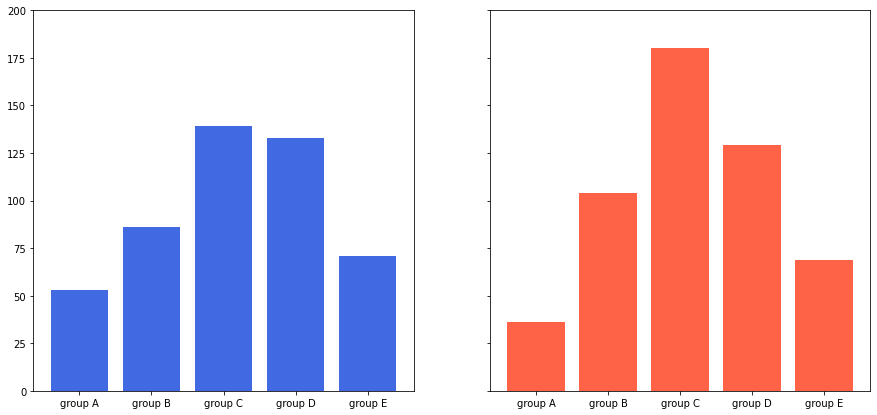

In [18]:
# (1) sharey 파라미터를 사용하여 y축의 범위를 공유할 수 있음 (범위 직접 지정 불가능)
fig, axes = plt.subplots(1, 2, figsize=(15, 7), sharey=True)
axes[0].bar(group['male'].index, group['male'], color='royalblue')
axes[1].bar(group['female'].index, group['female'], color='tomato')

# (2) set_ylim을 사용하여 axes에 있는 모든 plot의 y축 범위를 정해줄 수 있음
for ax in axes:
    ax.set_ylim(0, 200)

plt.show()

## 2-2 Stacked Bar Plot

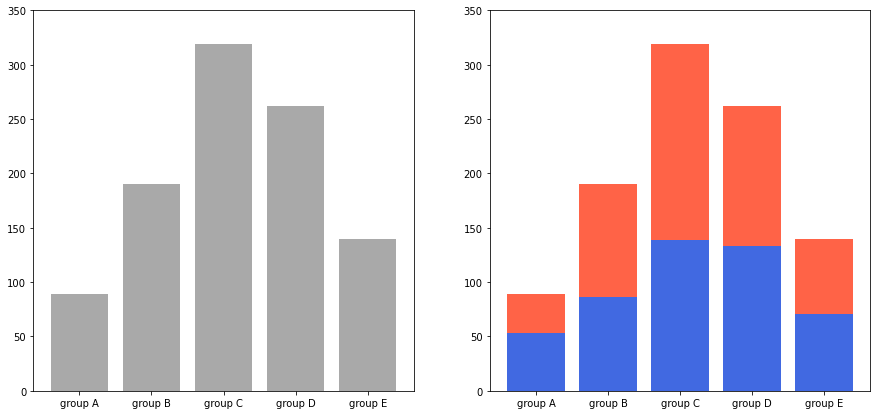

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

group_cnt = student['race/ethnicity'].value_counts().sort_index()
axes[0].bar(group_cnt.index, group_cnt, color='darkgray')

axes[1].bar(group['male'].index, group['male'], color='royalblue')
# bottom 파라미터를 사용해서 아래 공간을 설정할 수 있음
axes[1].bar(group['female'].index, group['female'], bottom=group['male'], color='tomato')

for ax in axes:
    ax.set_ylim(0, 350)

plt.show()

## 2-3 Percentage Stacked Bar Plot

race/ethnicity
group E    140
group D    262
group C    319
group B    190
group A     89
Name: race/ethnicity, dtype: int64


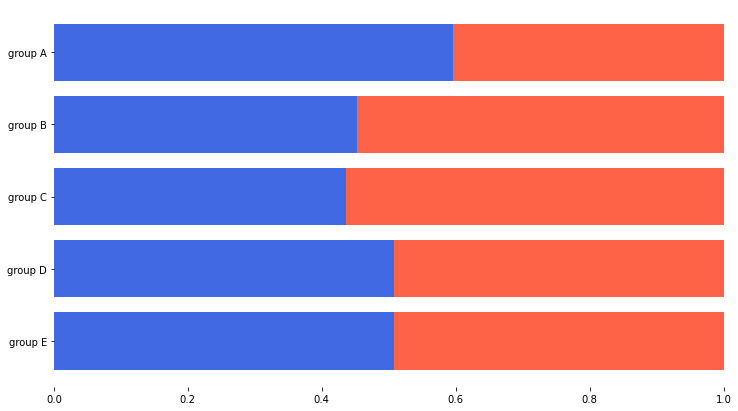

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))

group = group.sort_index(ascending=False)    # 역순 정렬: 그룹이 위에서 부터 정렬 되도록
total = group['male'] + group['female']      # 각 그룹별 합

print(total)

ax.barh(group['male'].index, group['male']/total, color='royalblue')
ax.barh(group['female'].index, group['female']/total,
       left=group['male']/total,
       color='tomato')

ax.set_xlim(0, 1)         # x축 범위 설정
for s in ['top', 'bottom', 'left', 'right']:        # 상하좌우 테두리 없애기
    ax.spines[s].set_visible(False)
    
plt.show()

## 2-4 Overlapped Bar Plot

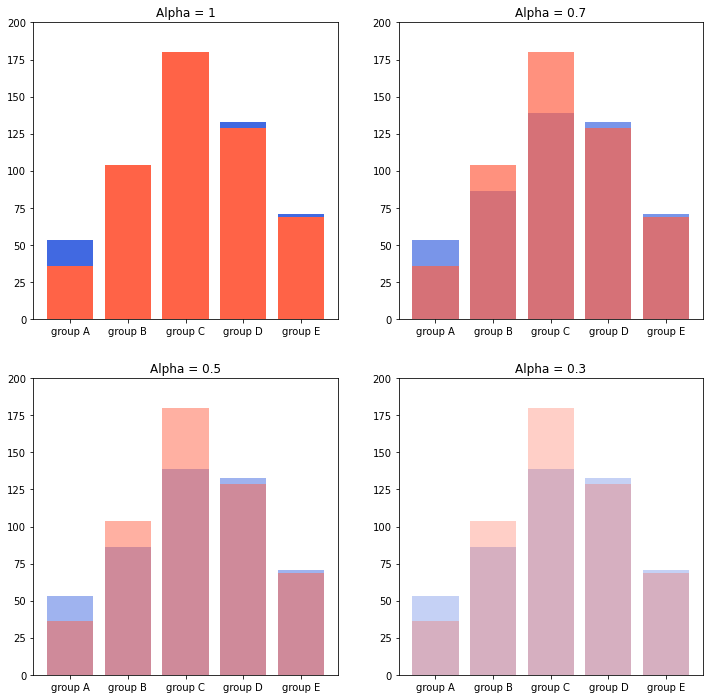

In [34]:
group = group.sort_index()    # 다시 정렬

fig, axes = plt.subplots(2, 2, figsize=(12, 12))
axes = axes.flatten()

for idx, alpha in enumerate([1, .7, .5, .3]):        # 0.7 선호
    axes[idx].bar(group['male'].index, group['male'], 
                  color='royalblue', 
                  alpha=alpha)    # alpha값 설정
    axes[idx].bar(group['female'].index, group['female'], 
                  color='tomato', 
                  alpha=alpha)
    axes[idx].set_title(f'Alpha = {alpha}')
    
for ax in axes:
    ax.set_ylim(0, 200)
    
plt.show()

## 2-5 Grouped Bar Plot

```matplotlib```에서 구현하기 조금 까다로움  
```matplotlib```에선 x축을 정해주고 그래프를 그리기 때문에 grouped bar plot을 그리려면
* x축 조정
* ```width``` 조정
* ```xticks```, ```xticklabels``` 설정 

을 해줘야함  

예를 들어 원래 x축이 0, 1, 2, 3로 시작한다면
* 한 그래프는 0-width 2, 1-width/2, 2-width/2 로 구성하면 되고,
* 한 그래프는 0+width/2, 1+width/2, 2+width/2 로 구성하면 됨

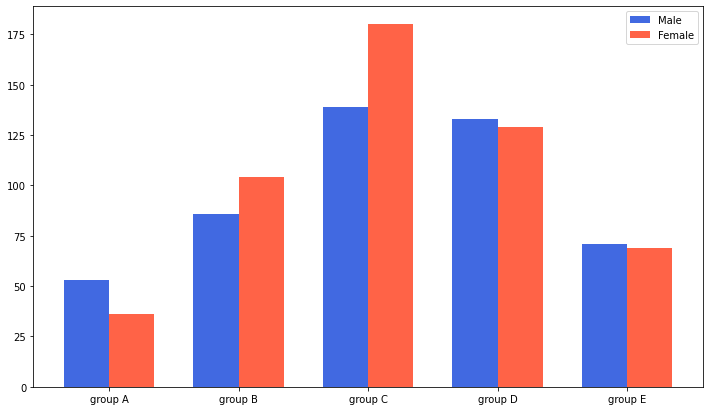

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))

idx = np.arange(len(group['male'].index))
width = .35

ax.bar(idx-width/2, group['male'],
      color='royalblue',
      width=width, label='Male')
ax.bar(idx+width/2, group['female'],
      color='tomato',
      width=width, label='Female')

ax.set_xticks(idx)
ax.set_xticklabels(group['male'].index)
ax.legend()

plt.show()

그룹이 N개 일때 x 좌표는 다음과 같다:  
* 2개: -1/2, +1/2  
* 3개: -2/2, 0, +2/2  
* 4개: -3/2, -1/2, +1/2, +3/2  

즉, index i(zero-index)에 대해서는 다음과 같이 x좌표를 계산할 수 있다.  
* $x+{{-N+1+2\times i} \over {2}} \times width$

In [57]:
group = student.groupby('parental level of education')['race/ethnicity'].value_counts().sort_index()
group_list = sorted(student['race/ethnicity'].unique())
edu_lv = student['parental level of education'].unique()
group['high school']

race/ethnicity
group A    18
group B    48
group C    64
group D    44
group E    22
Name: race/ethnicity, dtype: int64

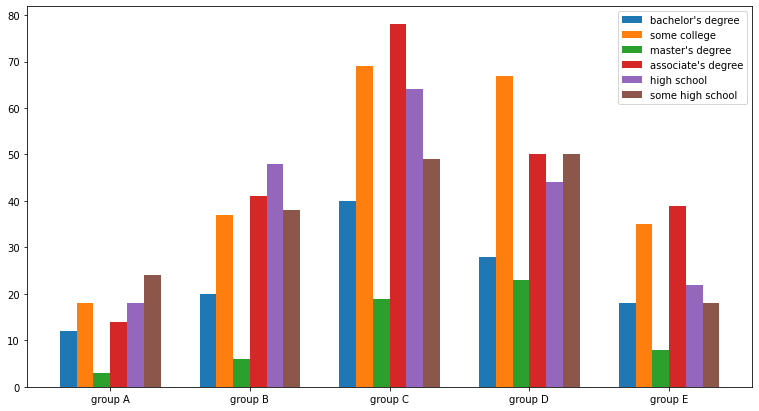

In [54]:
fig, ax = plt.subplots(1, 1, figsize=(13, 7))

x = np.arange(len(group_list))
width = .12

for idx, g in enumerate(edu_lv):
    ax.bar(x+(-len(edu_lv)+1+2*idx)*width/2, group[g],
          width=width, label=g)
    
ax.set_xticks(x)
ax.set_xticklabels(group_list)
ax.legend()

plt.show()

## 3-1 Principle of Proportion Ink

In [60]:
score = student.groupby('gender').mean().T
score

gender,female,male
math score,63.633205,68.728216
reading score,72.608108,65.473029
writing score,72.467181,63.311203


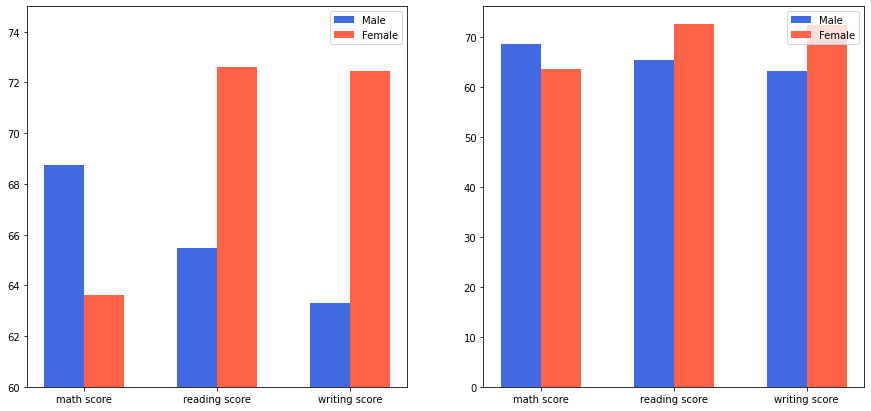

In [62]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

idx = np.arange(len(score.index))
width = .3

for ax in axes:
    ax.bar(idx-width/2, score['male'],
          color='royalblue',
          width=width, label='Male')
    ax.bar(idx+width/2, score['female'],
          color='tomato',
          width=width, label='Female')
    
    ax.set_xticks(idx)
    ax.set_xticklabels(score.index)
    ax.legend()
    
axes[0].set_ylim(60, 75)

plt.show()

# 좌측 그래프는 정확한 수치를 표현하지 못한다. 되도록이면 오른쪽 그래프처럼 정확한 수치를 표현하자
# 공간이 안된다면 figsize를 위아래로 길게 해서 그래프를 그리자

## 3-2 데이터 정렬하기

In [63]:
student.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## 3-3 적절한 공간 활용


In [64]:
group_cnt = student['race/ethnicity'].value_counts().sort_index()
group_cnt

group A     89
group B    190
group C    319
group D    262
group E    140
Name: race/ethnicity, dtype: int64

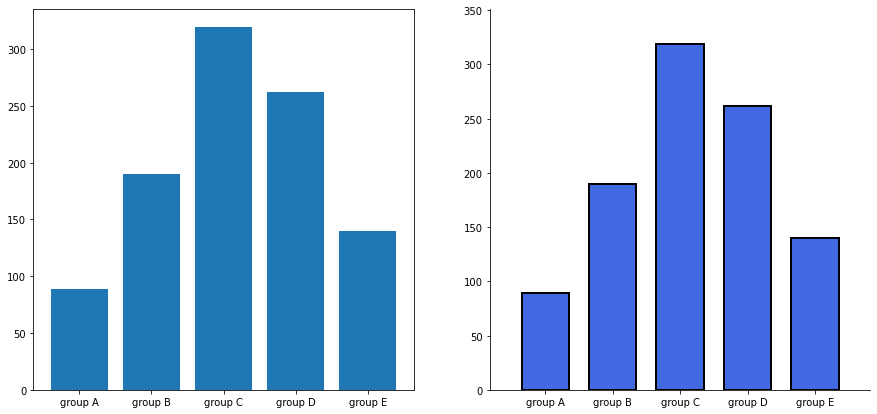

In [69]:
fig = plt.figure(figsize=(15, 7))
ax_basic = fig.add_subplot(1, 2, 1)
ax = fig.add_subplot(1, 2, 2)

ax_basic.bar(group_cnt.index, group_cnt)    # 꾸미지 않은 것

ax.bar(group_cnt.index, group_cnt,
      width=.7,
      edgecolor='black',          # 각 막대 테두리 색
      linewidth=2,
      color='royalblue')
ax.margins(.1, .1)                # 양쪽 마진
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

plt.show()

## 3-4 그리드 추가

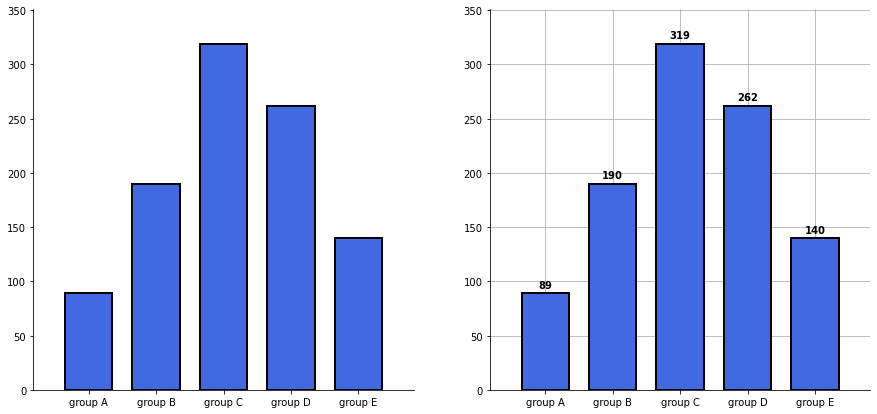

In [73]:
group_cnt = student['race/ethnicity'].value_counts().sort_index()

fig, axes = plt.subplots(1, 2, figsize=(15, 7))

for ax in axes:
    ax.bar(group_cnt.index, group_cnt,
      width=.7,
      edgecolor='black',
      linewidth=2,
      color='royalblue',
      zorder=10)
    
    ax.margins(.1, .1)
    
    for s in ['top', 'right']:
        ax.spines[s].set_visible(False)
        
axes[1].grid(zorder=0)    # 그리드 추가

for idx, value in zip(group_cnt.index, group_cnt):
    axes[1].text(idx, value+5, s=value,
                ha='center',
                fontweight='bold')
        
plt.show()

## 3-5 ETC 오차막대 사용

In [74]:
score_var = student.groupby('gender').std().T
score_var

gender,female,male
math score,15.491453,14.356277
reading score,14.378245,13.931832
writing score,14.844842,14.113832


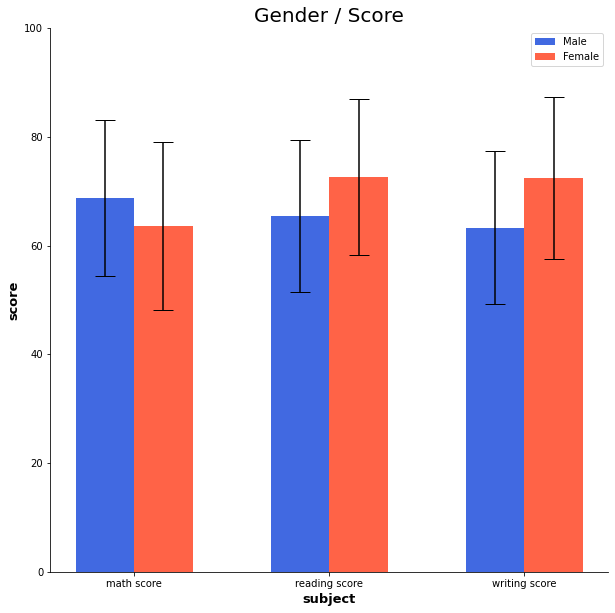

In [79]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

idx = np.arange(len(score.index))
width = .3

ax.bar(idx-width/2, score['male'],
      color='royalblue',
      width=width,
      label='Male',
      yerr=score_var['male'],    # y축 범위로 에러 표현
      capsize=10)                # 범위 표현

ax.bar(idx+width/2, score['female'],
      color='tomato',
      width=width,
      label='Female',
      yerr=score_var['female'],  # y축 범위로 에러 표현
      capsize=10)                # 범위 표현

ax.set_xticks(idx)
ax.set_xticklabels(score.index)
ax.set_ylim(0, 100)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.legend()
ax.set_title('Gender / Score', fontsize=20)
ax.set_xlabel('subject', fontweight='bold', fontsize=13)
ax.set_ylabel('score', fontweight='bold', fontsize=13)

plt.show()